# **Movie Gross Predicting Model**
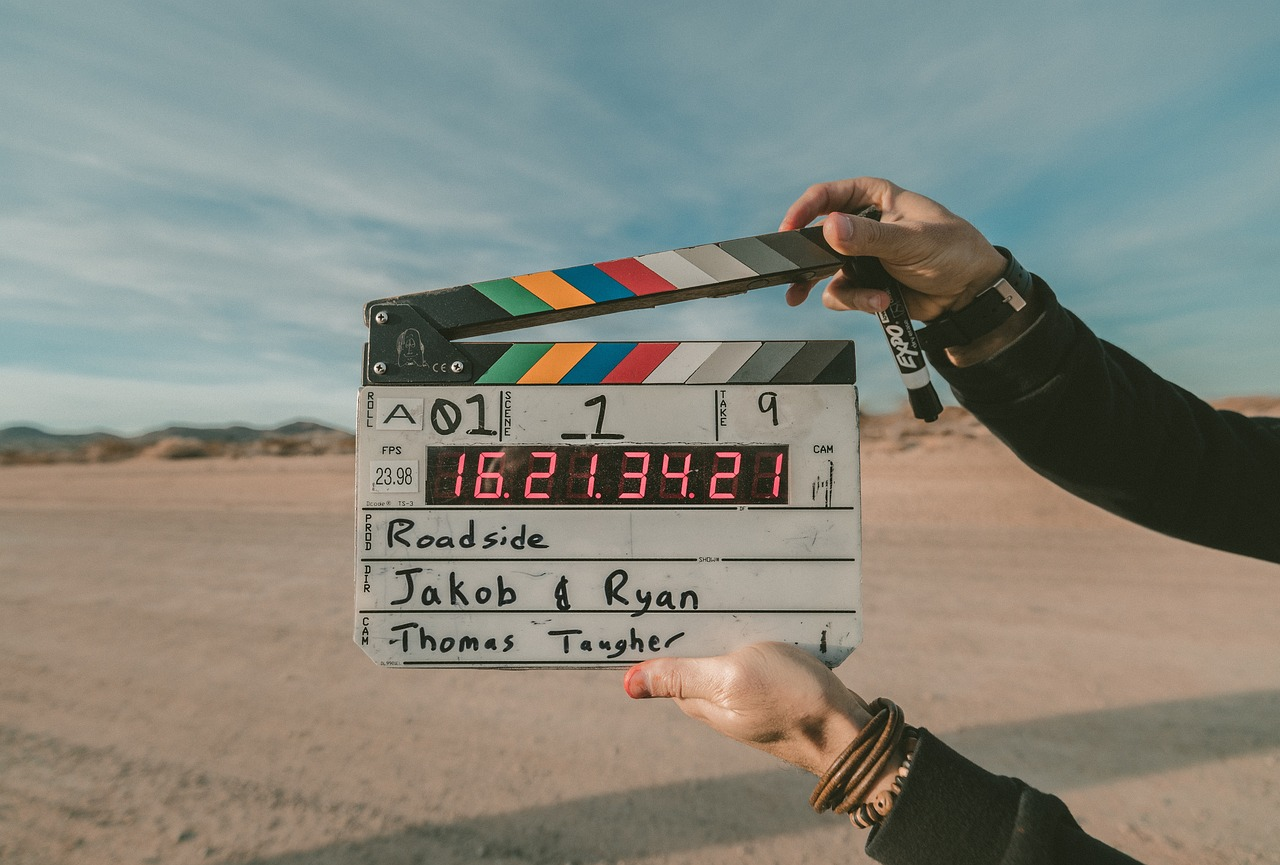

# **Overview**

In the competitive world of film production, predicting a movie’s revenue (gross) before its release is a challenge yet a necessity. It allows stakeholders to make informed decisions regarding marketing strategies, distribution plans, and other critical aspects. This project embarks on an in-depth analysis of various features that might impact a movie's revenue, with the ultimate goal of developing a robust predictive model. This model aims to estimate the revenue of movies based on features such as budget, genre, production companies, and countries, runtime, year etc.

# **Objective**

To develop the movie's gross predicting model using machine learning techniques

# **Data description**

Source : Kaggle (https://www.kaggle.com/datasets/danielgrijalvas/movies/data)

Features : There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

**budget:** the budget of a movie. Some movies don't have this, so it appears as 0

**company:** the production company

**country:** country of origin

**director:** the director

**genre:** main genre of the movie.

**gross:** revenue of the movie

**name:** name of the movie

**rating:** rating of the movie (R, PG, etc.)

**released:** release date (YYYY-MM-DD)

**runtime:** duration of the movie

**score:** IMDb user rating

**votes:** number of user votes

**star:** main actor/actress

**writer:** writer of the movie

**year:** year of release

# **Data collection**

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

**Analysing the dataset : Loading and getting the overview**

In [ ]:
#loading a dataset to a pandas dataframe
dataset = pd.read_csv('/content/movies.csv')
dataset.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
dataset.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [ ]:
dataset.shape

(7668, 15)

In [ ]:
dataset.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
#checking missing values
dataset.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [ ]:
#checking for duplicate values
dataset.duplicated().sum()

0

<Axes: >

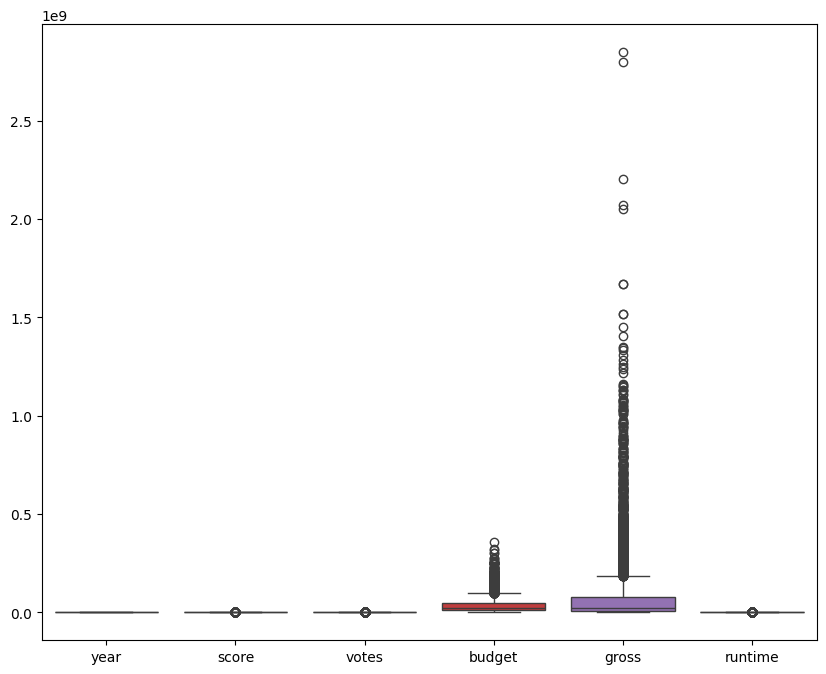

In [ ]:
#checking the outliers
plt.figure(figsize = (10,8))
sns.boxplot(data = dataset)

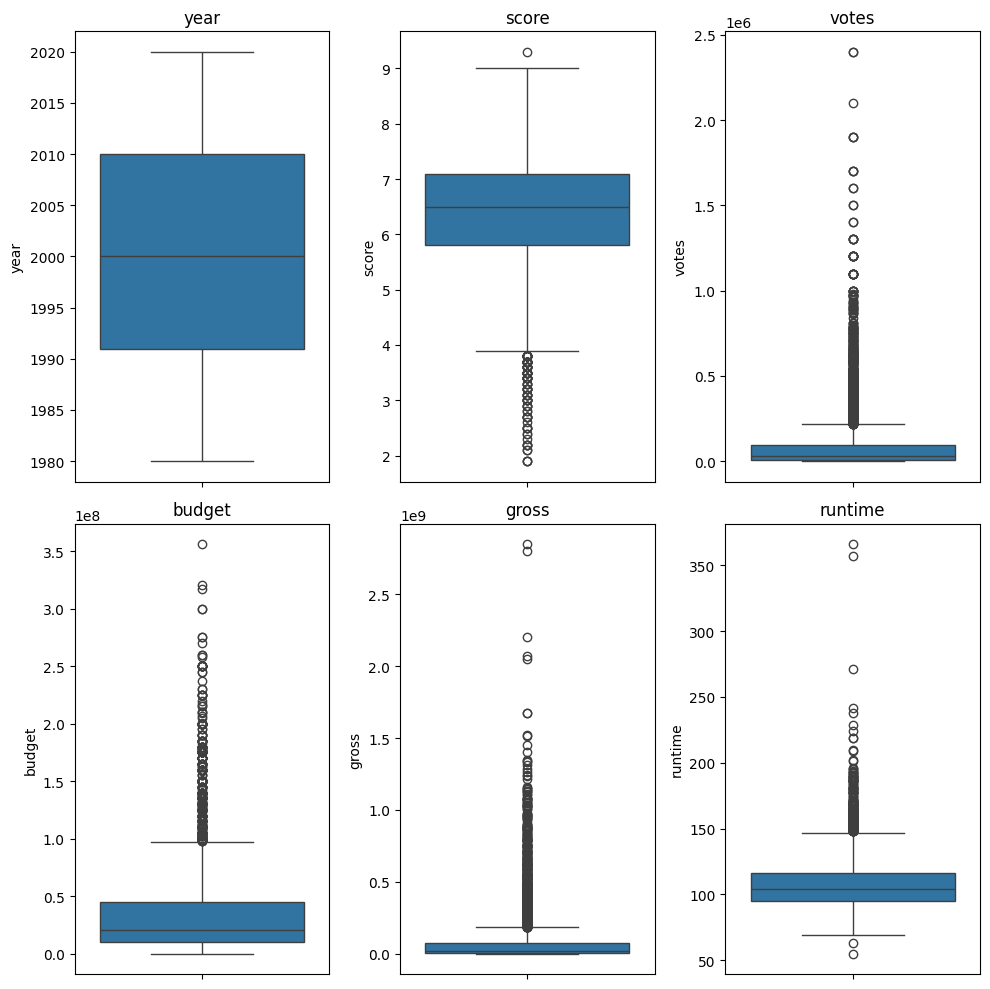

In [ ]:
#subplot for all numerical columns
numerical_cols = dataset.select_dtypes(include=['int64','float64'])
#create subplots
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
axes = axes.flatten()
#plot boxplot for each numerical columns
for i, column in enumerate(numerical_cols):
  sns.boxplot(y=dataset[column], ax=axes[i])
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

# **Data Preprocessing and cleaning**

To fill the null values of numerical datatypes, we will use the median beacause the outliers are more present here and median is less sensitive to ouliers

In [ ]:
dataset['gross'].mean()

78500541.01778312

In [ ]:
dataset['gross'].median()

20205757.0

In [ ]:
dataset['score'].median()

6.5

In [ ]:
dataset['score'].mean()

6.390410958904109

In [ ]:
#handling missing values of numerical datatypes
dataset["gross"] = dataset["gross"].fillna(dataset["gross"].median())
dataset["budget"] = dataset["budget"].fillna(dataset["budget"].median())
dataset["runtime"] = dataset["runtime"].fillna(dataset["runtime"].median())
dataset["score"] = dataset["score"].fillna(dataset["score"].median())
dataset["votes"] = dataset["votes"].fillna(dataset["votes"].median())
dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,NaN,120.0


In [ ]:
dataset['rating'].mode()

,rating
0,R


In [ ]:
dataset['rating'].mode()[0]

'R'

In [ ]:
#handling missing values of categorical column
dataset["rating"] = dataset["rating"].fillna(dataset["rating"].mode()[0])
dataset["writer"] = dataset["writer"].fillna(dataset["writer"].mode()[0])
dataset["star"] = dataset["star"].fillna(dataset["star"].mode()[0])
dataset["country"] = dataset["country"].fillna(dataset["country"].mode()[0])
dataset["company"] = dataset["company"].fillna(dataset["company"].mode()[0])

In [ ]:
dataset.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,2
score,0
votes,0
director,0
writer,0
star,0


In [ ]:
print(dataset[['released', 'year','country']])

                              released  year         country
0        June 13, 1980 (United States)  1980  United Kingdom
1         July 2, 1980 (United States)  1980   United States
2        June 20, 1980 (United States)  1980   United States
3         July 2, 1980 (United States)  1980   United States
4        July 25, 1980 (United States)  1980   United States
...                                ...   ...             ...
7663  October 23, 2020 (United States)  2020   United States
7664  February 7, 2020 (United States)  2020   United States
7665         April 27, 2020 (Cameroon)  2020   United States
7666   October 1, 2020 (United States)  2020   United States
7667   August 19, 2020 (United States)  2020    South Africa

[7668 rows x 3 columns]


In [ ]:
#Drop the released column
dataset = dataset.drop("released", axis='columns')

In [ ]:
dataset.head(2)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [ ]:
dataset.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
score,0
votes,0
director,0
writer,0
star,0
country,0


# Exploratory Data Analysis (EDA)

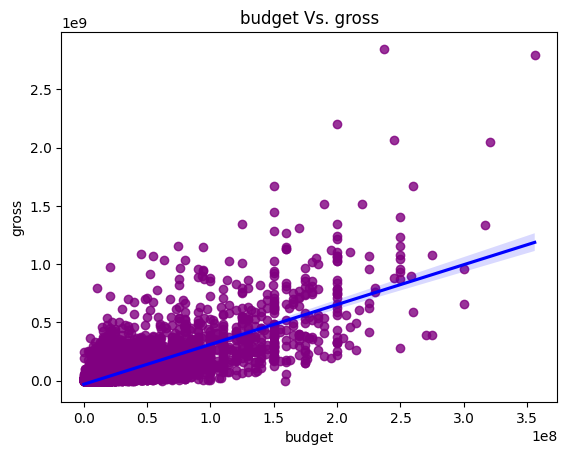

In [ ]:
sns.regplot(x='budget', y='gross', data= dataset, scatter_kws={"color": "purple"}, line_kws={"color":"blue"})
plt.title('budget Vs. gross')
plt.ylabel("gross")
plt.xlabel("budget")
plt.show()

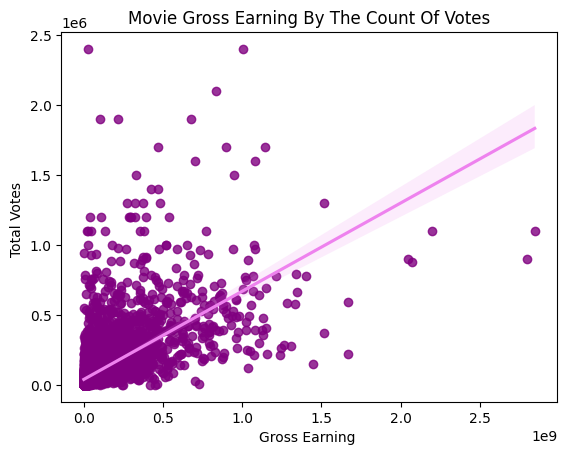

In [ ]:
sns.regplot(x='gross', y='votes', data= dataset, scatter_kws={"color": "purple"}, line_kws={"color":"Violet"})
plt.title('Movie Gross Earning By The Count Of Votes')
plt.ylabel("Total Votes ")
plt.xlabel("Gross Earning ")
plt.show()

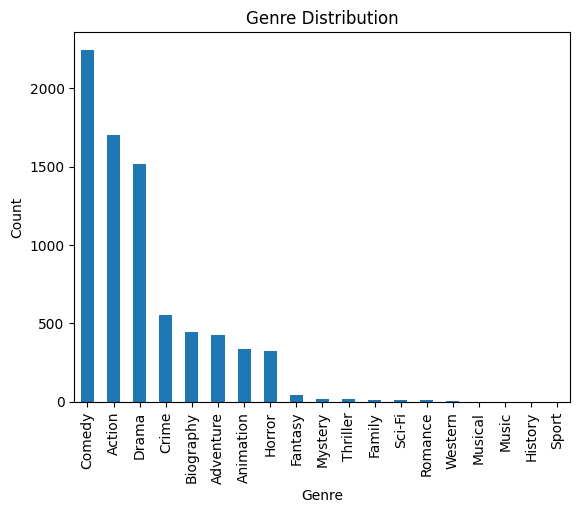

In [ ]:
dataset['genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
genre_counts = dataset.groupby('genre').size()
print(genre_counts.sort_values(ascending=False))

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Romance        10
Sci-Fi         10
Western         3
Musical         2
Sport           1
Music           1
History         1
dtype: int64


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'score'}>],
       [<Axes: title={'center': 'votes'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'runtime'}>]], dtype=object)

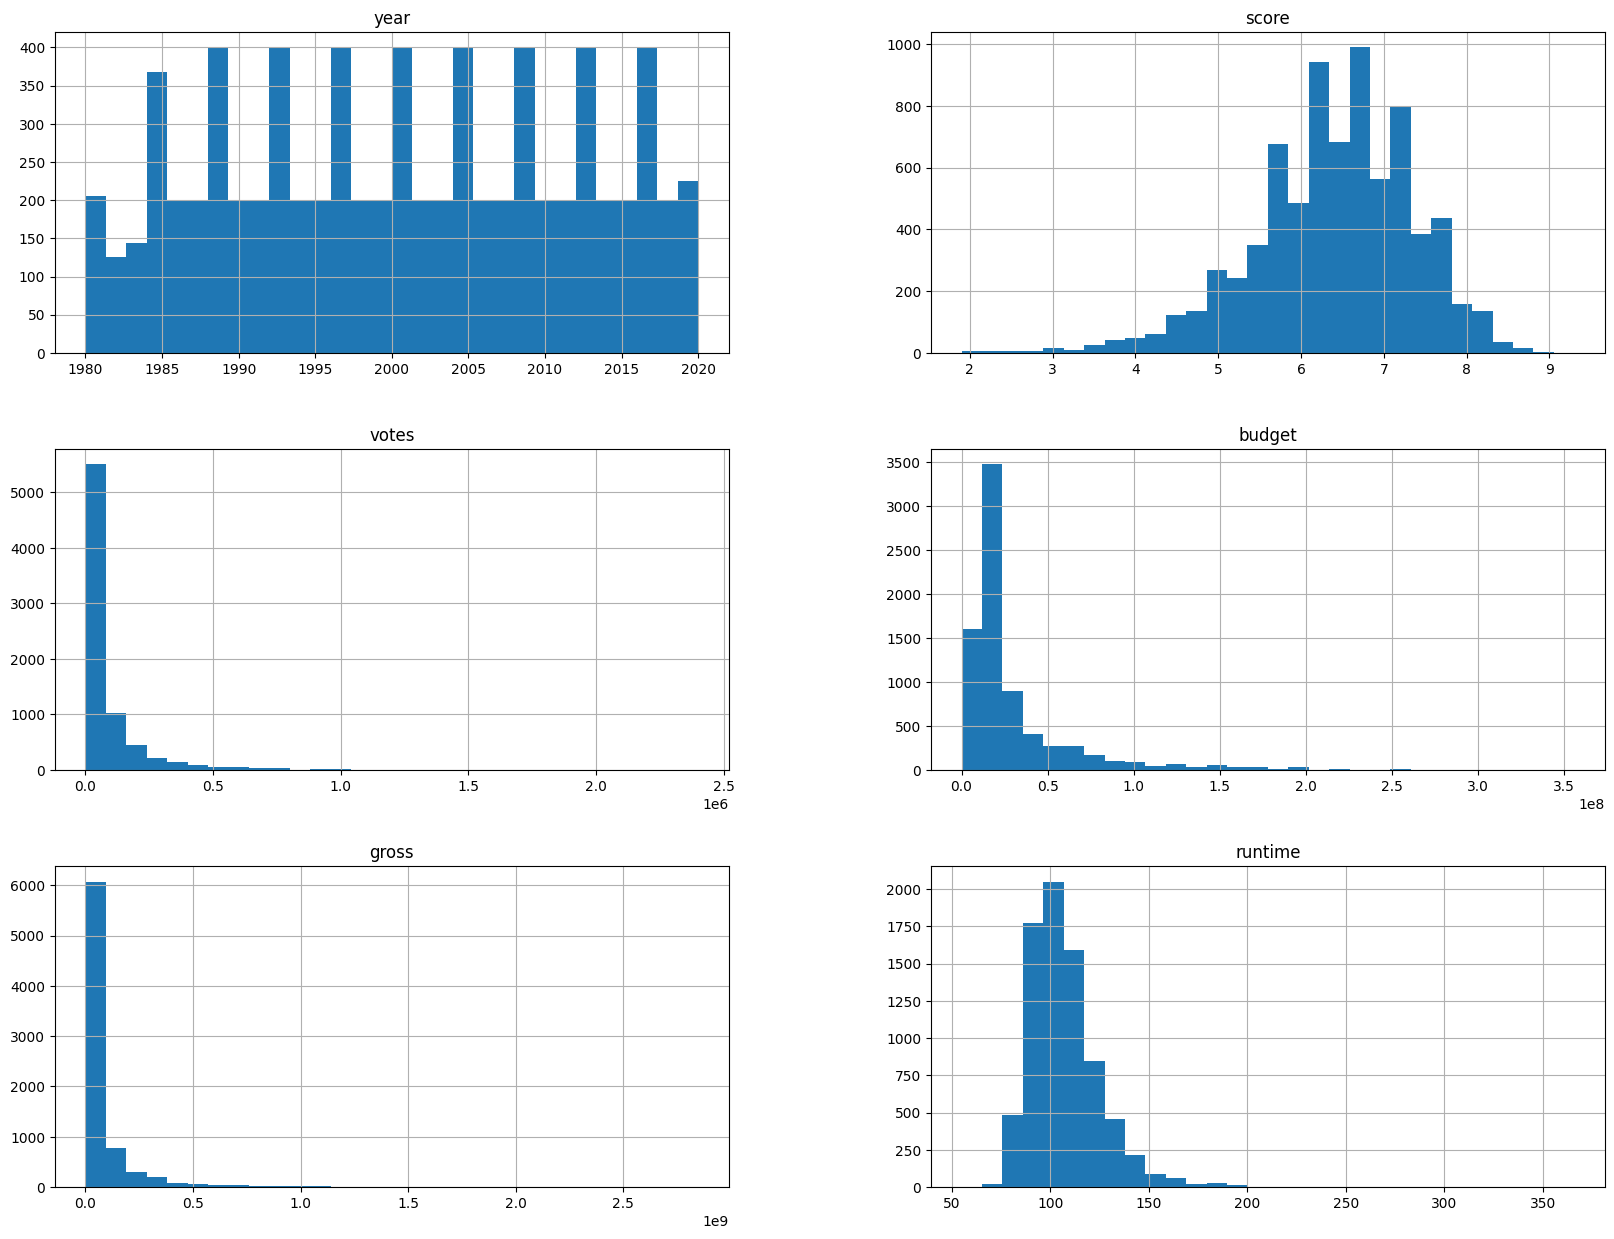

In [ ]:
dataset.hist(bins=30, figsize=(20,15))

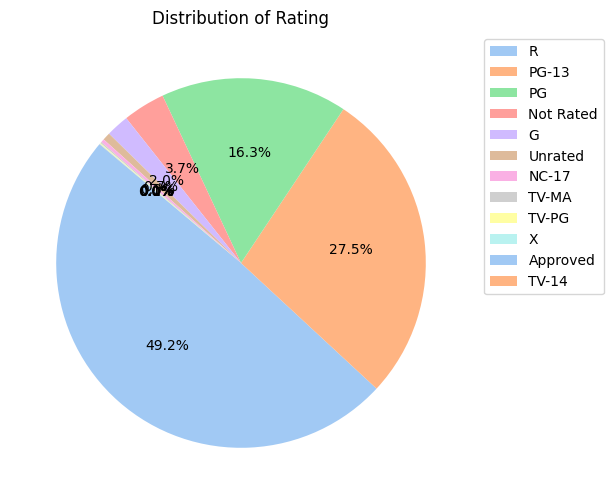

In [ ]:
# Count the occurrences of each category in the 'Gender' column
rating_counts = dataset['rating'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.legend(rating_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Distribution of Rating')
plt.show()



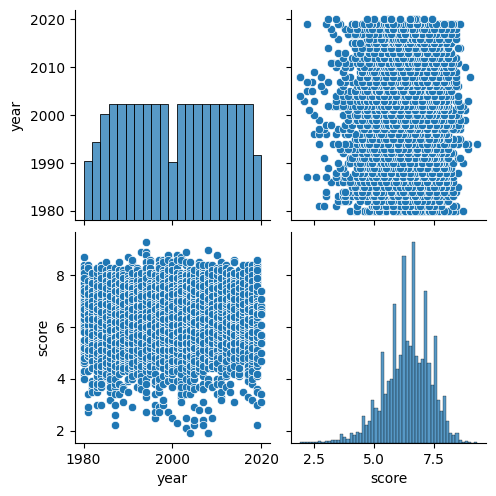

In [ ]:
sns.pairplot(dataset[["year","score"]])
plt.show()

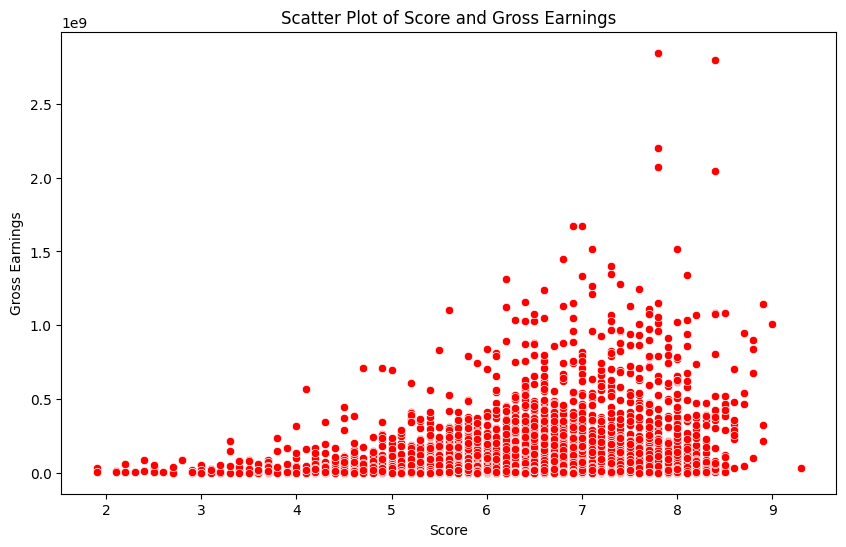

In [ ]:
# Scatter Plot of Score and Gross Earnings

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x="score", y="gross", color='r')
plt.xlabel("Score")
plt.ylabel("Gross Earnings")
plt.title("Scatter Plot of Score and Gross Earnings")
plt.show()

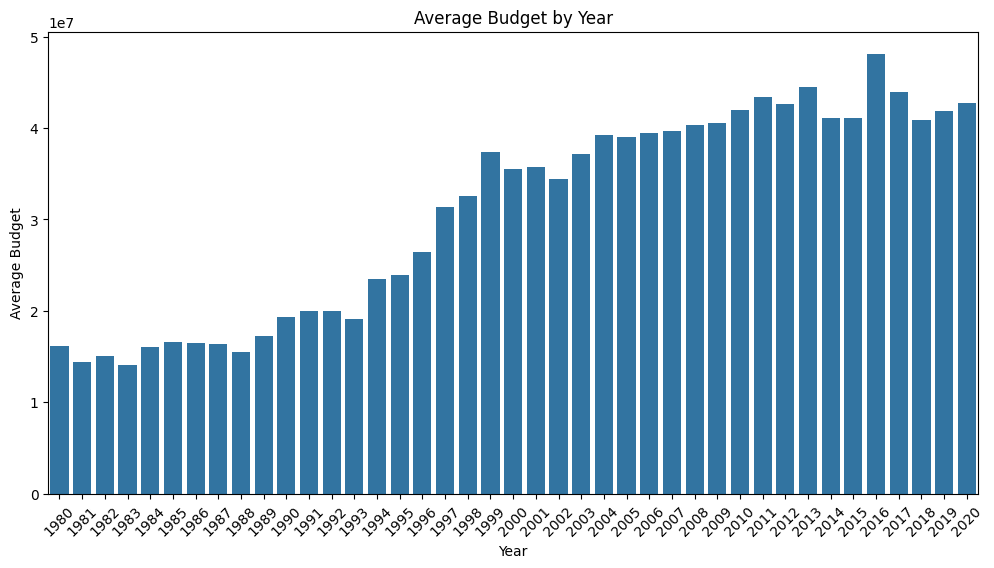

In [ ]:
# Barplot of Budget by Year

plt.figure(figsize=(12, 6))
sns.barplot(data=dataset, x="year", y="budget", errorbar=None, estimator=np.mean)
plt.xlabel("Year")
plt.ylabel("Average Budget")
plt.title("Average Budget by Year")
plt.xticks(rotation=45)
plt.show()

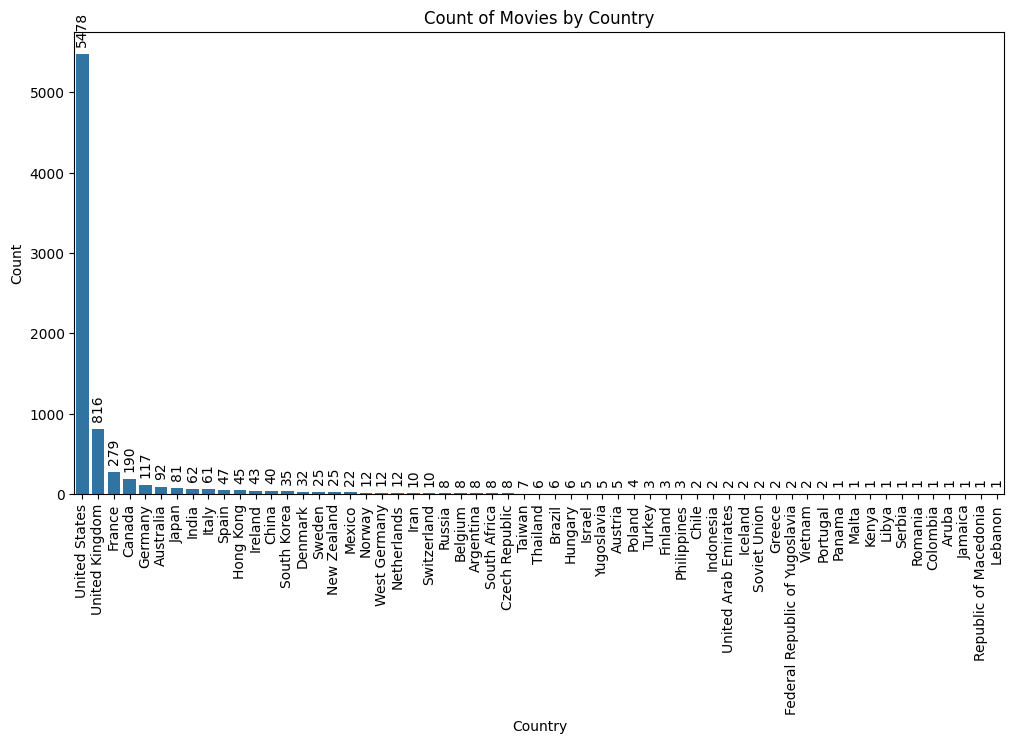

In [ ]:
# Count of Movies by Country with Annotations

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=dataset, x="country", order=dataset["country"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Count of Movies by Country")

# Adding vertical annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points', rotation='vertical')


plt.show()

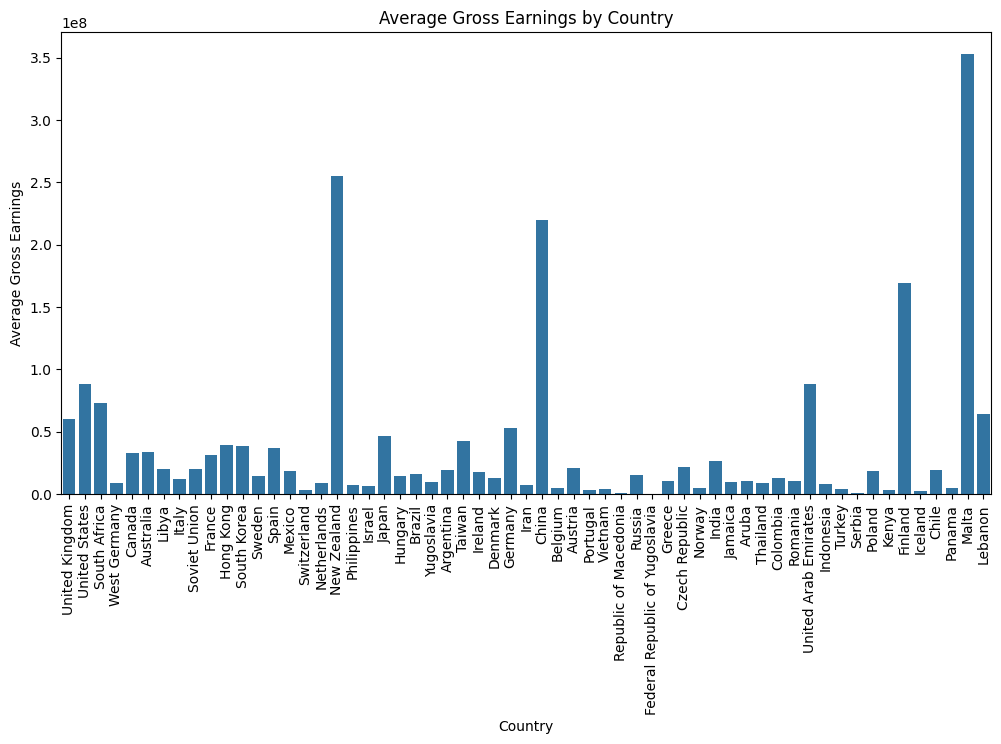

In [ ]:
# Barplot of Average Gross Earnings by Country

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dataset, x="country", y="gross", errorbar = None, estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Gross Earnings")
plt.title("Average Gross Earnings by Country")
plt.show()

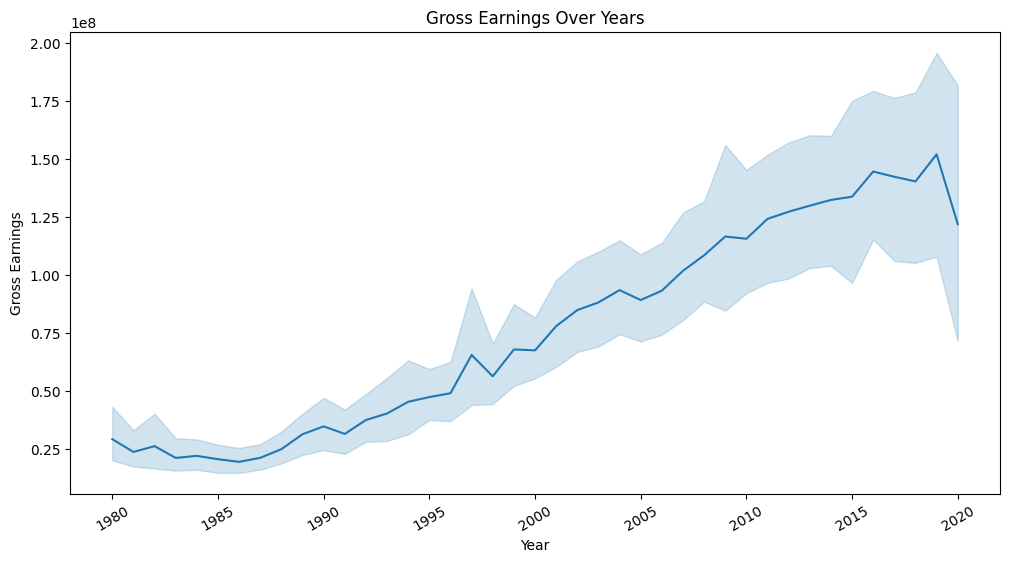

In [ ]:
# Line Plot of Gross Earnings Over Years

plt.figure(figsize=(12, 6))
dataset["year"] = dataset["year"].astype(int)
sns.lineplot(data=dataset, x="year", y="gross")
plt.xlabel("Year")
plt.ylabel("Gross Earnings")
plt.title("Gross Earnings Over Years")
plt.xticks(rotation=30)
plt.show()

**Finding Outliers**

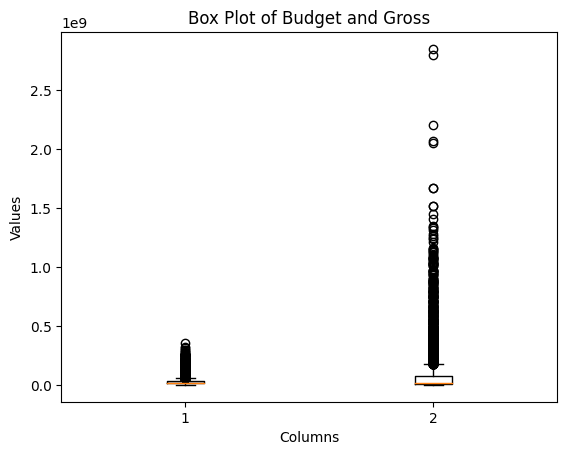

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([dataset['budget'], dataset['gross']])
plt.title('Box Plot of Budget and Gross')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

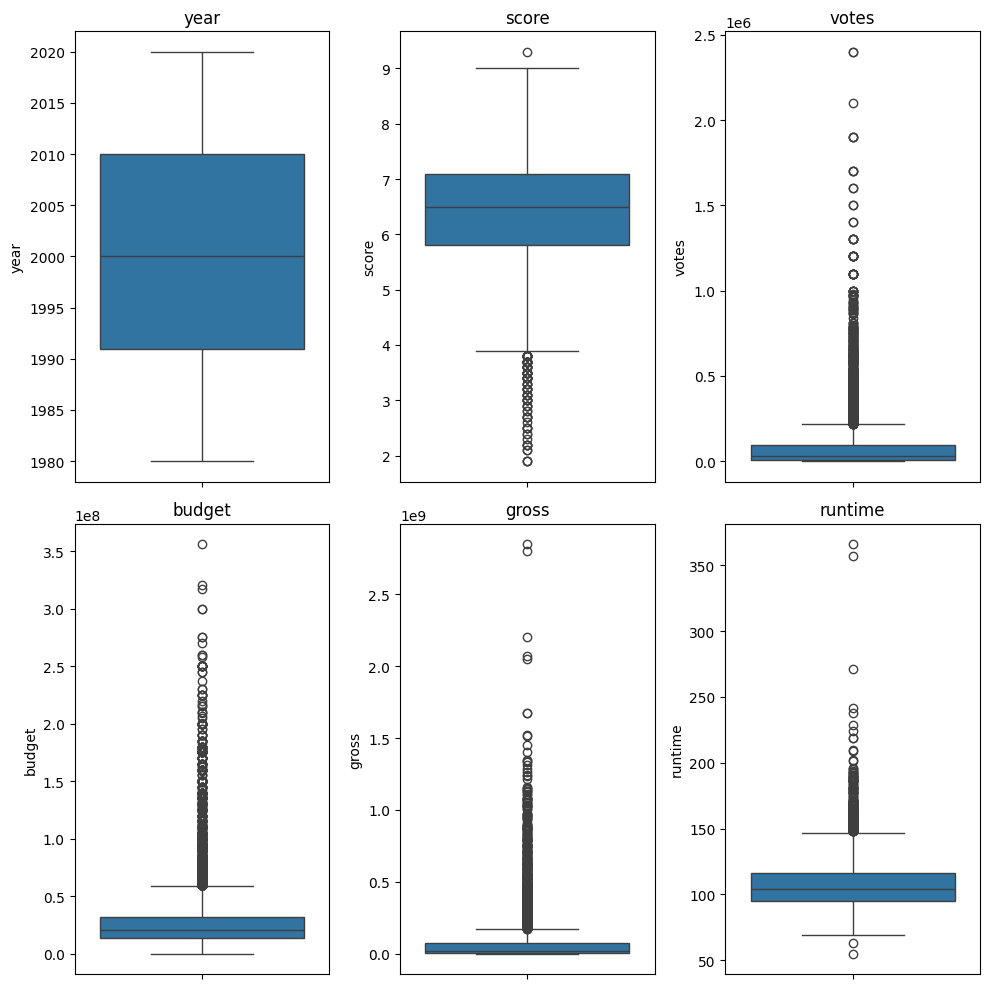

In [ ]:
#subplot for all numerical columns
numerical_cols = dataset.select_dtypes(include=['int64','float64'])
#create subplots
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
axes = axes.flatten()
#plot boxplot for each numerical columns
for i, column in enumerate(numerical_cols):
  sns.boxplot(y=dataset[column], ax=axes[i])
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
#finding outliers using IQR
numerical_cols = dataset.select_dtypes(include=['int64','float64']).columns
def iqr_outliers(dataset):
 Q1 = dataset.quantile(0.25)
 Q3 = dataset.quantile(0.75)
 IQR = Q3 - Q1

 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR

 outliers = (dataset < lower_bound) | (dataset > upper_bound)
 return outliers

#apply outliers detection to numerical column
outliers = dataset[numerical_cols].apply(iqr_outliers)
#identify row with outlier
outlier_rows = dataset[outliers.any(axis=1)]
#count total outlier rows
total_outlier_rows = len(outlier_rows)
print(f"Total outlier rows:{total_outlier_rows}")

Total outlier rows:1805


In [ ]:
#finding ouliers using z_score
from scipy import stats

# Select numerical columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# Create a copy of the dataset
dataset_copy = dataset.copy()

# Calculate Z-scores
dataset_copy[numerical_cols] = stats.zscore(dataset_copy[numerical_cols])

# Apply absolute value to Z-scores
dataset_copy[numerical_cols] = dataset_copy[numerical_cols].abs()

# Define threshold
threshold = 3

# Identify outliers based on Z-scores
outliers = dataset[(dataset_copy[numerical_cols] > threshold).any(axis=1)]

print("Outliers:")
print(outliers)

Outliers:
                                                name     rating      genre  \
0                                        The Shining          R      Drama   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
21                                     Heaven's Gate          R  Adventure   
49                                Lion of the Desert         PG  Biography   
92     Indiana Jones and the Raiders of the Lost Ark         PG     Action   
...                                              ...        ...        ...   
7640                                       El Coyote          R     Action   
7643                                           Tenet      PG-13     Action   
7650                                        Dolittle         PG  Adventure   
7659                                       I Am Fear  Not Rated     Horror   
7663                                    More to Life          R      Drama   

      year  score      votes           director      

We found that there are many outliers in this dataset. Using the IQR method, we identified 1,805 outliers, and using the z-score method, we found 533 outliers. The box plot shows that the 'gross,' 'budget,' and 'votes' columns have more outliers than the others."

<Axes: xlabel='gross', ylabel='Density'>

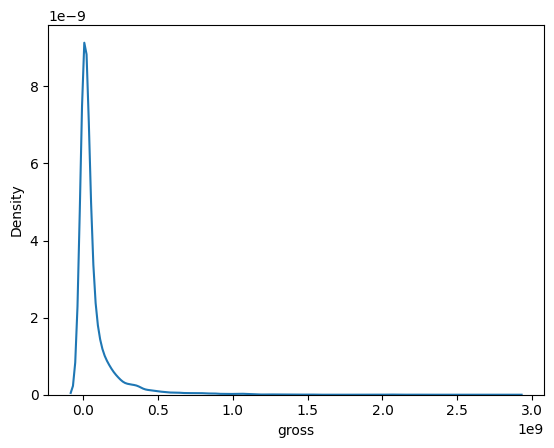

In [ ]:
sns.kdeplot(dataset['gross'])

<Axes: xlabel='budget', ylabel='Density'>

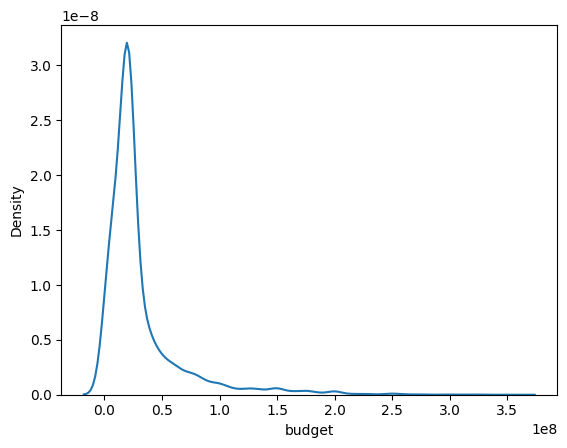

In [ ]:
sns.kdeplot(dataset['budget'])

<Axes: xlabel='votes', ylabel='Density'>

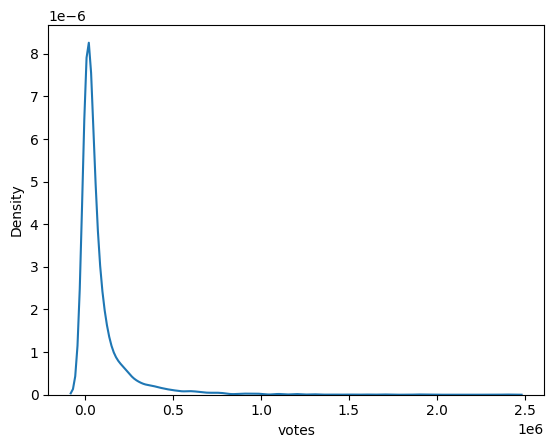

In [ ]:
sns.kdeplot(dataset['votes'])

**LOG Transformation**

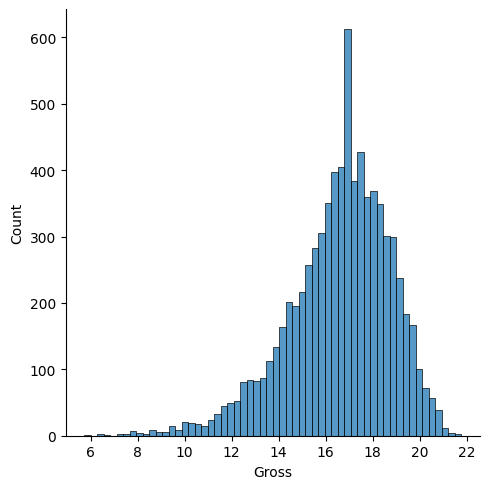

In [ ]:
#apply log transformation
dataset['Gross'] = np.log(dataset['gross']+1)
sns.displot(dataset['Gross'])

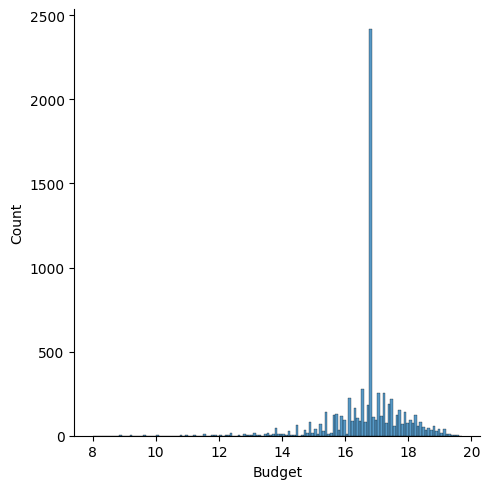

In [ ]:
#apply log transformation
dataset['Budget'] = np.log(dataset['budget']+1)
sns.displot(dataset['Budget'])

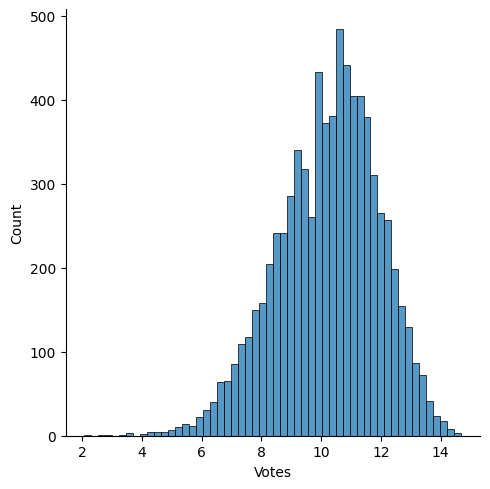

In [ ]:
#apply log transformation
dataset['Votes'] = np.log(dataset['votes']+1) # changed 'votestlog' to 'voteslog'
sns.displot(dataset['Votes'])


**Correlation Analysis**

In [ ]:
#correlation analysis
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = dataset[numerical_cols].corr()
print(corr_matrix)

             year     score     votes    budget     gross   runtime     Gross  \
year     1.000000  0.098013  0.222573  0.291690  0.259504  0.120662  0.239337   
score    0.098013  1.000000  0.409157  0.061931  0.185563  0.399407  0.128441   
votes    0.222573  0.409157  1.000000  0.460968  0.632120  0.309151  0.476484   
budget   0.291690  0.061931  0.460968  1.000000  0.745881  0.273371  0.513075   
gross    0.259504  0.185563  0.632120  0.745881  1.000000  0.244380  0.578509   
runtime  0.120662  0.399407  0.309151  0.273371  0.244380  1.000000  0.216432   
Gross    0.239337  0.128441  0.476484  0.513075  0.578509  0.216432  1.000000   
Budget   0.224608  0.016344  0.303271  0.719814  0.459136  0.276066  0.443245   
Votes    0.462159  0.426903  0.654611  0.435530  0.500239  0.288753  0.644410   

           Budget     Votes  
year     0.224608  0.462159  
score    0.016344  0.426903  
votes    0.303271  0.654611  
budget   0.719814  0.435530  
gross    0.459136  0.500239  
runtime  

In [ ]:
#correlation analysis
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
correlation = dataset[numerical_cols].corr() # Calculate correlation on the DataFrame
print(correlation['Gross'].sort_values(ascending=False)) # Access 'gross' column from the correlation matrix

Gross      1.000000
Votes      0.644410
gross      0.578509
budget     0.513075
votes      0.476484
Budget     0.443245
year       0.239337
runtime    0.216432
score      0.128441
Name: Gross, dtype: float64


<Axes: >

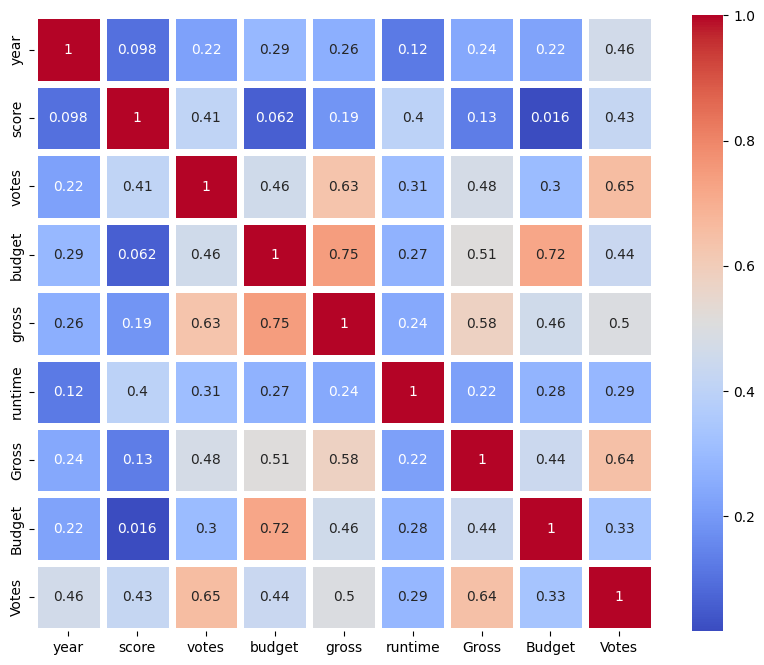

In [ ]:
#Heatmap for identifying relation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=5, annot_kws={'size':10}) # Correct the annot_kws parameter

# Feature Engineering

**Adding Derived features**

In [ ]:
dataset

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,Budget,Votes
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,17.665632,16.759950,13.739710
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,17.890555,15.319588,11.082158
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,20.104066,16.705882,13.997833
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,18.239801,15.068274,12.305923
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,17.500541,15.607270,11.589896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Universal Pictures,90.0,16.821478,8.853808,2.944439
7664,Dream Round,R,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0,16.821478,16.835935,3.610918
7665,Saving Mbango,R,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0,16.821478,10.981063,3.401197
7666,It's Just Us,R,Drama,2020,6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Universal Pictures,120.0,16.821478,9.615872,10.404293


In [ ]:
#adding feature 'profit/loss'
profitloss = (
    dataset["gross"]
    - dataset["budget"]
)
dataset.insert(loc=len(dataset.columns), column="profit/loss", value=profitloss)
# Use 'profitloss' instead of 'profit'
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
dataset.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,Budget,Votes,profit/loss
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,17.665632,16.759950,13.739710,27998772.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,17.890555,15.319588,11.082158,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,20.104066,16.705882,13.997833,520375067.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,18.239801,15.068274,12.305923,79953539.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,17.500541,15.607270,11.589896,33846344.0


In [ ]:
#drop unnecessary columns after log transform
cols = ['budget','gross','votes']
dataset = dataset.drop(columns = cols, axis = 1)
dataset.head()

,name,rating,genre,year,score,director,writer,star,country,company,runtime,Gross,Budget,Votes,profit/loss
0,The Shining,R,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146.0,17.665632,16.759950,13.739710,27998772.0
1,The Blue Lagoon,R,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104.0,17.890555,15.319588,11.082158,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124.0,20.104066,16.705882,13.997833,520375067.0
3,Airplane!,PG,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,88.0,18.239801,15.068274,12.305923,79953539.0
4,Caddyshack,R,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,98.0,17.500541,15.607270,11.589896,33846344.0


In [ ]:
dataset.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
score,0
director,0
writer,0
star,0
country,0
company,0


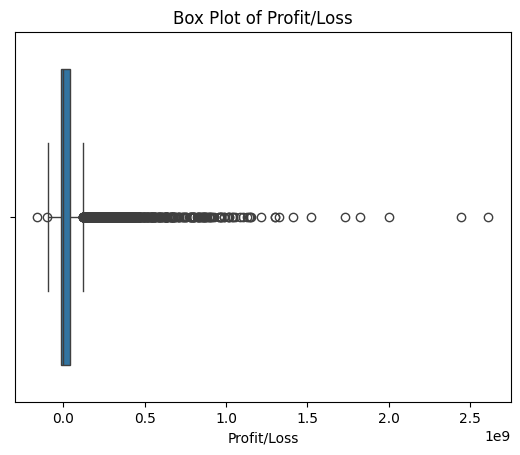

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame named dataset and a column named 'profit/loss'
sns.boxplot(x=dataset['profit/loss'])
plt.title('Box Plot of Profit/Loss')
plt.xlabel('Profit/Loss')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


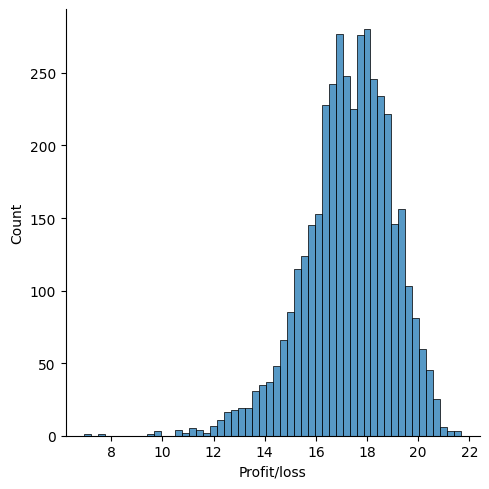

In [ ]:
#apply log transformation
dataset['Profit/loss'] = np.log(dataset['profit/loss']+1)
sns.displot(dataset['Profit/loss'])

In [ ]:
dataset.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
score,0
director,0
writer,0
star,0
country,0
company,0


In [ ]:
#drop unnecessary column after log transform
cols = ['profit/loss']
dataset = dataset.drop(columns = cols, axis = 1)
dataset.head()

,name,rating,genre,year,score,director,writer,star,country,company,runtime,Gross,Budget,Votes,Profit/loss
0,The Shining,R,Drama,1980,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146.0,17.665632,16.759950,13.739710,17.147671
1,The Blue Lagoon,R,Adventure,1980,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104.0,17.890555,15.319588,11.082158,17.811012
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124.0,20.104066,16.705882,13.997833,20.070060
3,Airplane!,PG,Comedy,1980,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,88.0,18.239801,15.068274,12.305923,18.196956
4,Caddyshack,R,Comedy,1980,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,98.0,17.500541,15.607270,11.589896,17.337342


In [ ]:
dataset["Profit/loss"] = dataset["Profit/loss"].fillna(dataset["Profit/loss"].mean())

In [ ]:
dataset.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
score,0
director,0
writer,0
star,0
country,0
company,0


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['rating', 'genre', 'company', 'writer', 'star', 'country', 'name', 'director']
le = LabelEncoder()
for col in cols:
  dataset[col] = le.fit_transform(dataset[col])

In [ ]:
dataset.head()

,name,rating,genre,year,score,director,writer,star,country,company,runtime,Gross,Budget,Votes,Profit/loss
0,6587,6,6,1980,8.4,2589,4014,1047,54,2319,146.0,17.665632,16.759950,13.739710,17.147671
1,5573,6,1,1980,5.8,2269,1632,327,55,731,104.0,17.890555,15.319588,11.082158,17.811012
2,5142,4,0,1980,8.7,1111,2567,1745,55,1540,124.0,20.104066,16.705882,13.997833,20.070060
3,286,4,4,1980,7.7,1301,2000,2246,55,1812,88.0,18.239801,15.068274,12.305923,18.196956
4,1027,6,4,1980,7.3,1054,521,410,55,1777,98.0,17.500541,15.607270,11.589896,17.337342


In [ ]:
dataset.tail()

,name,rating,genre,year,score,director,writer,star,country,company,runtime,Gross,Budget,Votes,Profit/loss
7663,3705,6,6,2020,3.1,1500,2289,2421,55,2281,90.0,16.821478,8.853808,2.944439,16.821132
7664,1678,6,4,2020,4.7,774,2614,1886,55,539,90.0,16.821478,16.835935,3.610918,17.280698
7665,4717,6,6,2020,5.7,2061,2683,2040,55,941,104.0,16.821478,10.981063,3.401197,16.818566
7666,2843,6,6,2020,6.5,1184,1824,450,55,2281,120.0,16.821478,9.615872,10.404293,16.820736
7667,5394,6,10,2020,5.7,2165,3344,2463,44,1787,102.0,16.821478,16.835935,2.079442,17.280698


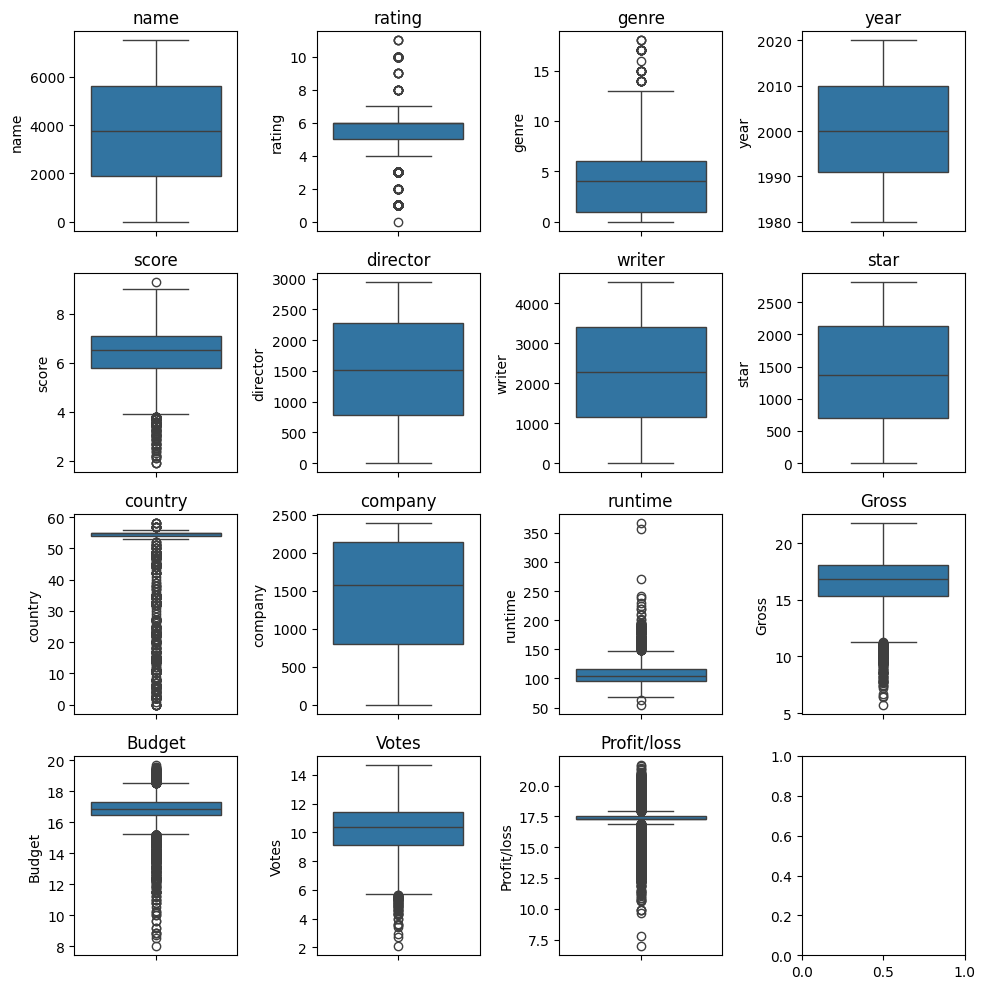

In [ ]:
#subplot for all numerical columns
numerical_cols = dataset.select_dtypes(include=['int64','float64'])
#create subplots
fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
axes = axes.flatten()
#plot boxplot for each numerical columns
for i, column in enumerate(numerical_cols):
  sns.boxplot(y=dataset[column], ax=axes[i])
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
print(dataset.dtypes)

name             int64
rating           int64
genre            int64
year             int64
score          float64
director         int64
writer           int64
star             int64
country          int64
company          int64
runtime        float64
Gross          float64
Budget         float64
Votes          float64
Profit/loss    float64
dtype: object


In [ ]:
corr_matrix = dataset.corr()
print(corr_matrix)

                 name    rating     genre      year     score  director  \
name         1.000000 -0.012441  0.016355  0.011453  0.017105  0.009079   
rating      -0.012441  1.000000  0.123465  0.027931  0.013276  0.016255   
genre        0.016355  0.123465  1.000000 -0.081261  0.027965 -0.015258   
year         0.011453  0.027931 -0.081261  1.000000  0.098013 -0.020795   
score        0.017105  0.013276  0.027965  0.098013  1.000000  0.009540   
director     0.009079  0.016255 -0.015258 -0.020795  0.009540  1.000000   
writer       0.010018 -0.002795  0.006746 -0.007901  0.019745  0.299512   
star         0.006749  0.005314 -0.004856 -0.027745 -0.001006  0.039715   
country     -0.010425  0.026930 -0.035896 -0.069423 -0.134557  0.017926   
company      0.010369 -0.079626 -0.070013 -0.011438 -0.004570  0.004250   
runtime      0.010335  0.066597 -0.052719  0.120662  0.399407  0.017611   
Gross       -0.003724 -0.132061 -0.247155  0.239337  0.128441  0.016978   
Budget       0.014059 -0.

Text(120.72222222222221, 0.5, 'Features')

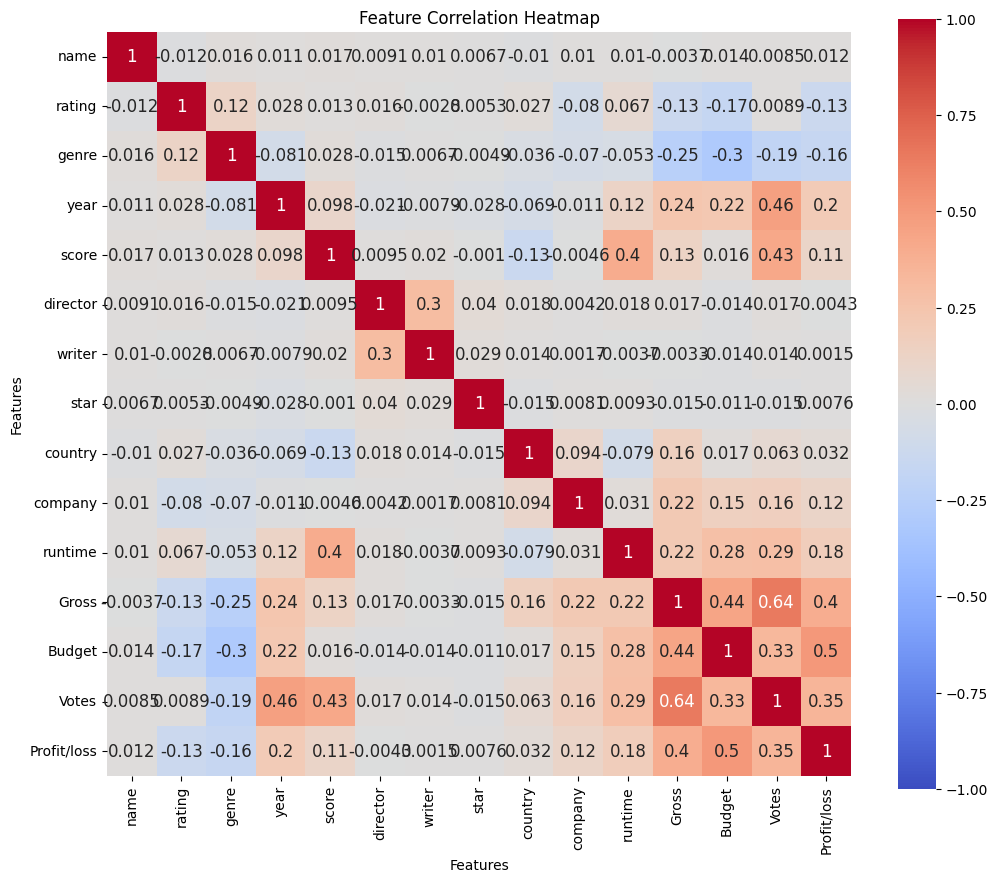

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={'size': 12}, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Feature Selection

We apply Recursive Feature Elimination (RFE) with the linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Define the feature matrix (X) and target variable (y)
X = dataset.drop('Gross', axis=1)
y = dataset['Gross']

# Create a Linear Regression model
lr_model = LinearRegression()

# Create an RFE object with the Linear Regression model
rfe = RFE(lr_model, n_features_to_select=10)

# Fit the RFE object to the data
fit = rfe.fit(X, y)
#print
print("selected features: %s" % X.columns[fit.support_])
print("Feature ranking: %s" % fit.ranking_)

selected features: Index(['rating', 'genre', 'year', 'score', 'country', 'company', 'runtime',
       'Budget', 'Votes', 'Profit/loss'],
      dtype='object')
Feature ranking: [5 1 1 1 1 2 3 4 1 1 1 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split

# Extract the selected features from the dataset
selected_features = X.columns[fit.support_]
X_selected = X[selected_features]

In [ ]:
X_selected

,rating,genre,year,score,country,company,runtime,Budget,Votes,Profit/loss
0,6,6,1980,8.4,54,2319,146.0,16.759950,13.739710,17.147671
1,6,1,1980,5.8,55,731,104.0,15.319588,11.082158,17.811012
2,4,0,1980,8.7,55,1540,124.0,16.705882,13.997833,20.070060
3,4,4,1980,7.7,55,1812,88.0,15.068274,12.305923,18.196956
4,6,4,1980,7.3,55,1777,98.0,15.607270,11.589896,17.337342
...,...,...,...,...,...,...,...,...,...,...
7663,6,6,2020,3.1,55,2281,90.0,8.853808,2.944439,16.821132
7664,6,4,2020,4.7,55,539,90.0,16.835935,3.610918,17.280698
7665,6,6,2020,5.7,55,941,104.0,10.981063,3.401197,16.818566
7666,6,6,2020,6.5,55,2281,120.0,9.615872,10.404293,16.820736


**Split Data into Training and Testing Sets:**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'dataset' is a Pandas DataFrame with columns 'feature1', 'feature2', ..., 'featureN', and 'gross'

# Split data into features (X) and target (y)
X = dataset.drop('Gross', axis=1)  # feature matrix with many columns
y = dataset['Gross']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)

# Model Building

In [ ]:
#simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
r2 = r2_score(y_test, y_pred1)
print("R-squared for linear regression model:", r2)
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error for linear regression model:", mse)
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error for linear regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error for linear regression model:", rmse)

R-squared for linear regression model: 0.5295890502765399
Mean Squared Error for linear regression model: 2.2856714609057502
Mean Absolute Error for linear regression model: 1.0530340251215404
Root Mean Squared Error for linear regression model: 1.5118437289964033


In [ ]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred2 = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred2)
print("R-squared for Decision Tree Regression model:", r2)
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error for Decision Tree Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error for Decision Tree Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Root Mean Squared Error for Decision Tree Regression model:", rmse)

R-squared for Decision Tree Regression model: 0.6430839276060079
Mean Squared Error for Decision Tree Regression model: 1.7342132046226766
Mean Absolute Error for Decision Tree Regression model: 0.6707120361246355
Root Mean Squared Error for Decision Tree Regression model: 1.3168952899234914


In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred3 = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred3)
print("R-squared for Random Forest Regression model:", r2)
mse = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error for Random Forest Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred3)
print("Mean Absolute Error for Random Forest Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
print("Root Mean Squared Error for Random Forest Regression model:", rmse)

R-squared for Random Forest Regression model: 0.7919446829917667
Mean Squared Error for Random Forest Regression model: 1.010916307656053
Mean Absolute Error for Random Forest Regression model: 0.5048110598698138
Root Mean Squared Error for Random Forest Regression model: 1.0054433388590591


In [ ]:
#Gradient Boosting Regression

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred4 = gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred4)
print("R-squared for Gradient Boosting Regression:", r2)
mse = mean_squared_error(y_test, y_pred4)
print("Mean Squared Error for Gradient Boosting Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred4)
print("Mean Absolute Error for Gradient Boosting Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
print("Root Mean Squared Error for Random Forest Regression model:", rmse)

R-squared for Gradient Boosting Regression: 0.775203297951599
Mean Squared Error for Gradient Boosting Regression model: 1.0922607279439753
Mean Absolute Error for Gradient Boosting Regression model: 0.6075477120284938
Root Mean Squared Error for Random Forest Regression model: 1.045112782403878


In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred5 = lasso_model.predict(X_test)
r2 = r2_score(y_test, y_pred5)
print("R-squared for Gradient Boosting Regression:", r2)
mse = mean_squared_error(y_test, y_pred5)
print("Mean Squared Error for Gradient Boosting Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred5)
print("Mean Absolute Error for Gradient Boosting Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred5))
print("Root Mean Squared Error for Random Forest Regression model:", rmse)

R-squared for Gradient Boosting Regression: 0.5132997997535695
Mean Squared Error for Gradient Boosting Regression model: 2.3648190127681907
Mean Absolute Error for Gradient Boosting Regression model: 1.0858153879692336
Root Mean Squared Error for Random Forest Regression model: 1.537796804772396


# Hyperparameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import  GridSearchCV

# Define models and parameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [5, 10]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'alpha': [0.1, 1, 10]}
    },

}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for model_name, config in models.items():
    model = config['model']
    params = config['params']

    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate the best model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error (mse): {mse:.3f}")
    print(f"Mean Absolute Error (mae): {mae:.3f}") # Dedent this line
    print(f"R-squared (R2): {r2:.3f}") # Dedent this line
    print(f"Root Mean Squared Error(rmse): {np.sqrt(mse):.3f}")
    print("-----")

Model: Linear Regression
Best parameters: {}
Mean Squared Error (mse): 2.286
Mean Absolute Error (mae): 1.053
R-squared (R2): 0.530
Root Mean Squared Error(rmse): 1.512
-----
Model: DecisionTreeRegressor
Best parameters: {'max_depth': 5}
Mean Squared Error (mse): 1.307
Mean Absolute Error (mae): 0.676
R-squared (R2): 0.731
Root Mean Squared Error(rmse): 1.143
-----
Model: Random Forest
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Mean Squared Error (mse): 1.024
Mean Absolute Error (mae): 0.517
R-squared (R2): 0.789
Root Mean Squared Error(rmse): 1.012
-----
Model: Gradient Boosting
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Mean Squared Error (mse): 1.074
Mean Absolute Error (mae): 0.603
R-squared (R2): 0.779
Root Mean Squared Error(rmse): 1.036
-----
Model: Lasso Regression
Best parameters: {'alpha': 0.1}
Mean Squared Error (mse): 2.365
Mean Absolute Error (mae): 1.086
R-squared (R2): 0.513
Root Mean Squared Error(rmse): 1.538
-----


### Random Forest Regression Model is the best model

R-squared (R2): 0.788

Mean Squared Error (mse): 1.029

Mean Absolute Error (mae): 0.518

Root Mean Squared Error(rmse): 1.014

To determine which model is best, we can compare their performance metrics, including Mean Squared Error (mse), Mean Absolute Error (mae), R-squared (r²), and Root Mean Squared Error (rmse). Based on the metrics provided, Random Forest appears to be the better model for this specific dataset and problem. It has slightly lower MSE, RMSE, and MAE, and a higher R² compared to the Gradient Boosting model. This suggests that the Random Forest model is better at making predictions with smaller errors and explains more of the variability in the target variable.

# **Test with Unseen Data:**

In [ ]:
# Create the test input as a dictionary with  data types
test_unseen = {
    'name': ['smile'],
    'rating': ['R'],
    'genre': ['Horror'],
    'year': [2022],
    'score': [6.5],
    'Votes': [174051 ],
    'director': ['Parker Finn'],
    'writer': ['Parker Finn'],
    'star': ['Sosie Bacon'],
    'country': ['United States'],
    'Budget': [17000000],
    'company': ['Paramount Pictures'],
    'runtime': [115],

}

# Convert the dictionary to a Pandas DataFrame
test_unseen_df = pd.DataFrame(test_unseen)

# Display the data types of each column
print(test_unseen_df.dtypes)

name         object
rating       object
genre        object
year          int64
score       float64
Votes         int64
director     object
writer       object
star         object
country      object
Budget        int64
company      object
runtime       int64
dtype: object


In [ ]:
test_unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1 non-null      object 
 1   rating    1 non-null      object 
 2   genre     1 non-null      object 
 3   year      1 non-null      int64  
 4   score     1 non-null      float64
 5   Votes     1 non-null      int64  
 6   director  1 non-null      object 
 7   writer    1 non-null      object 
 8   star      1 non-null      object 
 9   country   1 non-null      object 
 10  Budget    1 non-null      int64  
 11  company   1 non-null      object 
 12  runtime   1 non-null      int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 232.0+ bytes


In [ ]:

# Define a dictionary of custom mappings for categorical features
custom_mappings = {
    'name': {'smile': '7669'},
    'rating': {'R': '6'},
    'genre': {'Horror': '10'},  # Note: 'genre' value should be lowercase to match DataFrame
    'director': {'Parker Finn': '2950'},
    'writer': {'Parker Finn': '3010'},
    'star': {'Sosie Bacon': '4530'},
    'country': {'United States': '55'},  # Correct spelling
    'company': {'Paramount Pictures': '1812'},
}

# Apply the mappings using .replace() for each categorical column
for col, mapping in custom_mappings.items():
    test_unseen_df[col] = test_unseen_df[col].replace(mapping)  # Use 'test_unseen_df'

# Display the modified DataFrame
test_unseen_df

,name,rating,genre,year,score,Votes,director,writer,star,country,Budget,company,runtime
0,7669,6,10,2022,6.5,174051,2950,3010,4530,55,17000000,1812,115


In [ ]:
# Get missing columns from the training data
missing_cols = set(rf_model.feature_names_in_).difference(test_unseen_df.columns)

# Add missing columns to test_unseen_df and fill with zeros
for col in missing_cols:
    test_unseen_df[col] = 0

# Ensure the order of columns matches the training data
test_unseen_df = test_unseen_df[rf_model.feature_names_in_]

# Now try predicting again
y_pred = rf_model.predict(test_unseen_df)

In [ ]:
y_pred

array([19.13738636])

The value array([19.1345]) is the predicted logarithm of the gross value for the unseen data. To get the actual predicted gross value, you need to exponentiate this value, since the logarithm and exponential functions are inverses of each other.

In [ ]:
import numpy as np

y_pred_log = np.array([19.1345])  # Use np.array to create a NumPy array
y_pred = np.exp(y_pred_log)
print(y_pred)

[2.04177445e+08]


So we get predicted vaule for the target variable 'gross' is 204177445.

# Save the model

In [ ]:
import joblib
joblib.dump(rf_model, '/content/regressor.joblib')

['/content/regressor.joblib']

In [ ]:
loaded_model = joblib.load('/content/regressor.joblib')

In [ ]:
loaded_model.predict(test_unseen_df)

array([19.13738636])